In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv("C:/Users/Abdullah/Desktop/HousingData.csv")

In [66]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [67]:
df.shape

(506, 14)

# Handling missing value

In [68]:
missing_value=df.isnull()

In [69]:
for column in missing_value:
    print(missing_value[column].value_counts())

CRIM
False    486
True      20
Name: count, dtype: int64
ZN
False    486
True      20
Name: count, dtype: int64
INDUS
False    486
True      20
Name: count, dtype: int64
CHAS
False    486
True      20
Name: count, dtype: int64
NOX
False    506
Name: count, dtype: int64
RM
False    506
Name: count, dtype: int64
AGE
False    486
True      20
Name: count, dtype: int64
DIS
False    506
Name: count, dtype: int64
RAD
False    506
Name: count, dtype: int64
TAX
False    506
Name: count, dtype: int64
PTRATIO
False    506
Name: count, dtype: int64
B
False    506
Name: count, dtype: int64
LSTAT
False    486
True      20
Name: count, dtype: int64
MEDV
False    506
Name: count, dtype: int64


<Axes: >

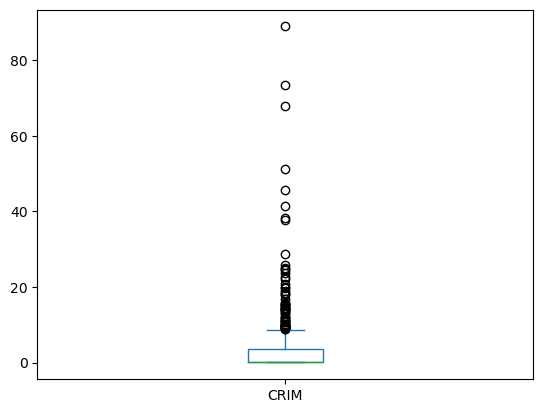

In [70]:
df.CRIM.plot(kind='box')

In [71]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: >

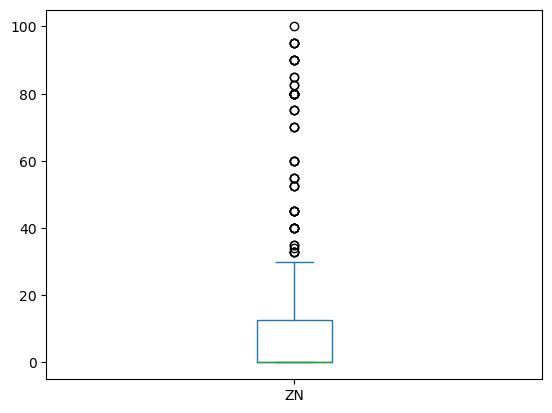

In [72]:
df.ZN.plot(kind='box')

<Axes: >

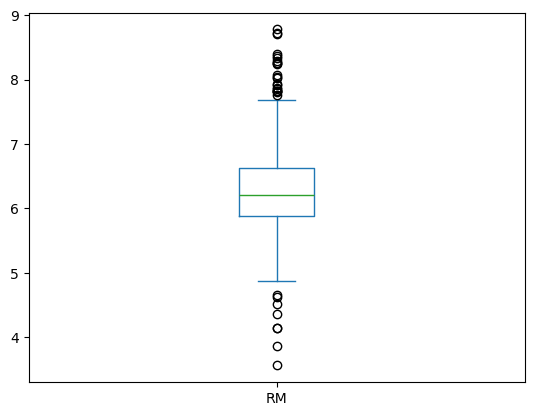

In [73]:
df.RM.plot(kind='box')

<Axes: >

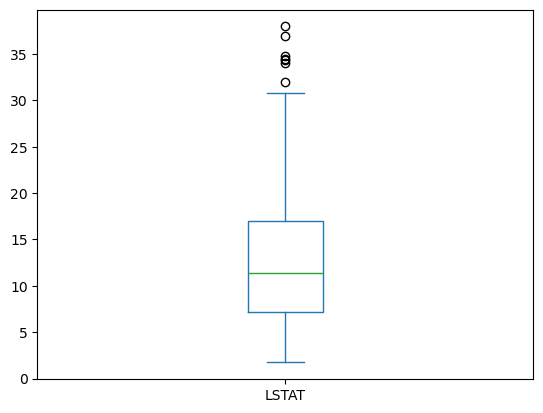

In [74]:
df.LSTAT.plot(kind='box')

<Axes: >

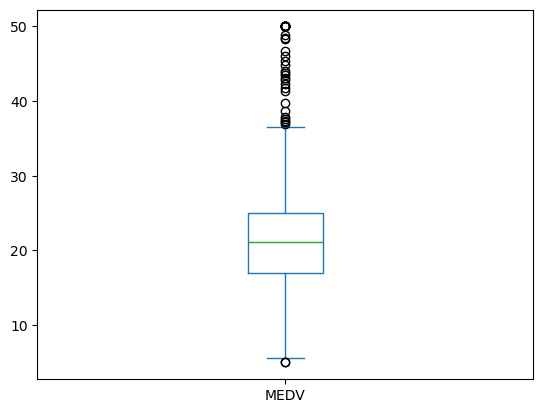

In [75]:
df.MEDV.plot(kind='box')

In [76]:
# so these are having outlier so we will replace with the median value

In [77]:
median_crim=df['CRIM'].median()
print(f"The median of CRIM is {median_crim}.")

The median of CRIM is 0.253715.


In [78]:
df['CRIM']=df['CRIM'].replace(np.nan,median_crim)

In [79]:
median_zn=df.ZN.median()
print(f"The median of Zn is{median_zn}")

The median of Zn is0.0


In [80]:
df['ZN']=df['ZN'].replace(np.nan,median_zn)

In [81]:
median_Indus=df['INDUS'].median()
print(f"The median of Indus is {median_Indus}.")

The median of Indus is 9.69.


In [82]:
df['INDUS']=df['INDUS'].replace(np.nan,median_Indus)

In [83]:
median_chas=df.CHAS.median()
print("The median is",median_chas)

The median is 0.0


In [84]:
df['CHAS']=df['CHAS'].replace(np.nan,median_chas)

In [85]:
median_age=df.AGE.median()

In [86]:
df['AGE']=df['AGE'].replace(np.nan,median_age)

In [87]:
median_Lstat=df.LSTAT.median()

In [88]:
df['LSTAT']=df['LSTAT'].replace(np.nan,median_Lstat)

In [89]:
df.isnull().value_counts()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  MEDV 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
Name: count, dtype: int64

# dealing with Outlier

In [90]:
# Identify columns with outliers
columns_with_outliers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

for column in columns_with_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Verify the changes
print(df.shape)

(338, 14)


In [94]:
from sklearn.model_selection import train_test_split
x=df.drop('MEDV',axis=1)
y=df['MEDV']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
import pandas as pd


In [99]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  76.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [100]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = -(2/n_samples) * np.dot(X.T, (y - y_predicted))
            db = -(2/n_samples) * np.sum(y - y_predicted)

            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [101]:
model=LinearRegression()
model.fit(X_train,y_train)

In [102]:
y_predic=model.predict(X_test)

In [105]:
# # Calculate performance metrics 
# mse = mean_squared_error(y_test, y_predic)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_predic)
# print(f"Mean Squared Error: {mse}") 
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R-squared: {r2}")
# # Visualize the results 
# plt.scatter(Y_test, predictions)
# plt.xlabel("Actual Values") 
# plt.ylabel("Predicted Values") 
# plt.title("Actual vs Predicted Values")
# plt.show()

In [106]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

def most_common_label(y):
    counter = Counter(y)
    return counter.most_common(1)[0][0]


In [107]:
class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth < self.max_depth and n_samples >= 2:
            best_split = self._best_split(X, y, n_features)
            if best_split:
                left_tree = self._grow_tree(*best_split['left'], depth + 1)
                right_tree = self._grow_tree(*best_split['right'], depth + 1)
                return Node(best_split['feature'], best_split['threshold'], left_tree, right_tree)
        return Leaf(most_common_label(y))

    def _best_split(self, X, y, n_features):
        best_split = {}
        max_gain = -1
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature, threshold)
                if gain > max_gain:
                    max_gain = gain
                    best_split = {
                        'feature': feature,
                        'threshold': threshold,
                        'left': (X[X[:, feature] <= threshold], y[X[:, feature] <= threshold]),
                        'right': (X[X[:, feature] > threshold], y[X[:, feature] > threshold])
                    }
        return best_split if max_gain > 0 else None

    def _information_gain(self, X, y, feature, threshold):
        parent_entropy = self._entropy(y)
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        n, n_left, n_right = len(y), sum(left_indices), sum(right_indices)
        if n_left == 0 or n_right == 0:
            return 0
        child_entropy = (n_left / n) * self._entropy(y[left_indices]) + (n_right / n) * self._entropy(y[right_indices])
        return parent_entropy - child_entropy

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        node = self.tree
        while isinstance(node, Node):
            if inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value


In [108]:
class Node:
    def __init__(self, feature, threshold, left, right):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right

class Leaf:
    def __init__(self, value):
        self.value = value


In [109]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            X_sample, y_sample = bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        return np.array([most_common_label(tree_pred) for tree_pred in tree_preds])


In [110]:
rf=RandomForest(n_trees=10,max_depth=10)

In [111]:
rf.fit(X_train,y_train)

KeyError: "None of [Index([103, 119,  36, 219, 147, 143, 191,  13, 217, 179,\n       ...\n       123, 201,  85, 183,  93,  42,  95, 160,  53, 170],\n      dtype='int32', length=270)] are in the [columns]"